# Project name: Civil Servants Remuneration in the EU
## Preliminary analysis
### Part 3: EU Number of civil servants
#### Step 2: Data visualization

In [6]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df_number = pd.read_csv('/Volumes/GoogleDrive-114951830941804947409/My Drive/Data analyst/Projects/Civil_Servant_Salary_EU/modified_data/3. EU_Number of civil servants.csv')

In [8]:
# check the data
df_number.head()

,time,geo,employees
0,2012,Belgium,34697.0
1,2012,Bulgaria,45114.0
2,2012,Czechia,19163.0
3,2012,Denmark,7832.0
4,2012,Germany,13280.0


#### View the levels of number of EU civil servant employees by increments of 25%

In [9]:
# group data by country
df_total = df_number.groupby('geo', as_index=False)['employees'].mean()
df_total

,geo,employees
0,Austria,21508.400000
1,Belgium,22675.500000
2,Bulgaria,36548.500000
3,Croatia,12812.500000
4,Cyprus,9431.500000
5,Czechia,19875.200000
6,Denmark,9639.800000
7,Estonia,8069.800000
8,Finland,29502.125000
9,France,136630.500000


In [10]:
# assign the bins using values from describe function
bin_edges = [int(df_total.describe()[3:].values[0]-1), # min values
             int(df_total.describe()[3:].values[1]), # 25% value
             int(df_total.describe()[3:].values[2]), # 50% value
             int(df_total.describe()[3:].values[3]), # 75% value
             int(df_total.describe()[3:].values[4]+1)] # max values
bin_names = ['below 25%', 'between 25%-50%', 'between 50%-75%', 'above 75%']

# cut the bins and add them to the new column
df_total['level'] = pd.cut(df_total['employees'], bin_edges, labels=bin_names)

# change the data type to categories
bin_cat = pd.api.types.CategoricalDtype(ordered=True, categories=bin_names)
df_total['level'] = df_total['level'].astype(bin_cat)

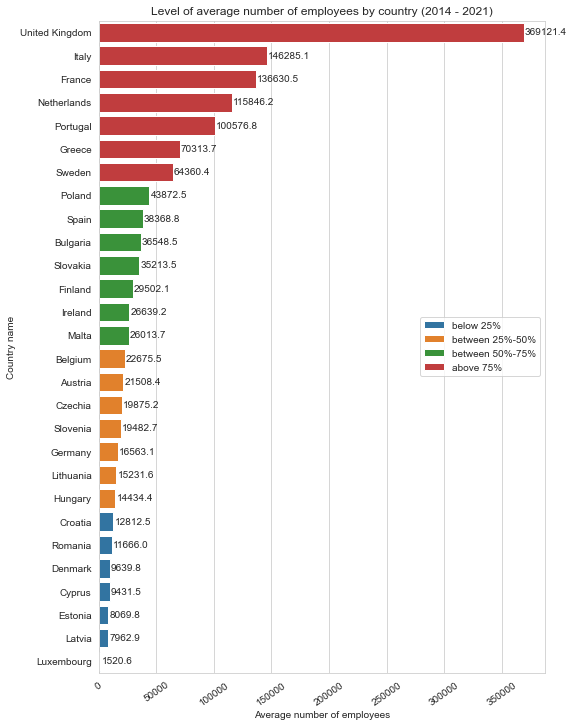

In [11]:
# a bar plot for a multi-variate representation
f, ax = plt.subplots(figsize=(8, 12))

# load the salary dataset
salary = df_total.sort_values("employees", ascending=False)

# plot the average salary data
sns.barplot(x="employees",
            y="geo",
            hue="level",
            data=salary,
            dodge=False)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="center right", frameon=True)

plt.title("Level of average number of employees by country (2014 - 2021)")
plt.xlabel("Average number of employees")
plt.xticks(rotation=35)
plt.ylabel("Country name");

# print the proportion text on the bars
sort = df_total['employees'].sort_values(ascending=False).reset_index(drop='index')
for i in range(sort.shape[0]):
    # iterrate through the sorted values
    value = sort[i]
    # convert value into string
    pct_string = '{:0.1f}'.format(value)
    # Print the string value on the bar.
    plt.text(value+1000, i, pct_string, va='center')